模式识别·第一次作业·线性分类器

In [3]:
%tensorflow_version 2.x
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio

path="/content/drive/My Drive/Pattern Recognition/Dataset"
os.chdir(path)
os.listdir(path)

['test_labels.mat', 'train_labels.mat', 'train_images.mat', 'test_images.mat']

In [0]:
train_images=sio.loadmat("train_images.mat")
test_images=sio.loadmat("test_images.mat")
train_labels=sio.loadmat("train_labels.mat")
test_labels=sio.loadmat("test_labels.mat")

def trans(a):
  a1=a.swapaxes(0,2)
  a2=a1.swapaxes(1,2)
  return a2

train_dataset_np=np.array(train_images.pop('train_images'))
train_dataset_np=trans(train_dataset_np)
train_labels_np=np.array(train_labels.pop('train_labels1'))
train_labels_np=train_labels_np.reshape(60000)
test_dataset_np=np.array(test_images.pop('test_images'))
test_dataset_np=trans(test_dataset_np)
test_labels_np=np.array(test_labels.pop('test_labels1'))
test_labels_np=test_labels_np.reshape(10000)

In [0]:
#for test
a=np.arange(0,24)
a1=a.reshape(2,3,4)
a2=trans(a1)
print(a.shape,a1.shape,a2.shape)


(60000, 28, 28) 47040000 3
(60000,) 60000 1
(10000, 28, 28) 7840000 3
(10000,) 10000 1


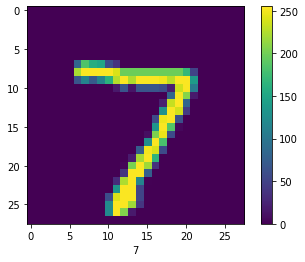

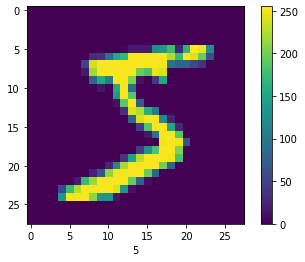

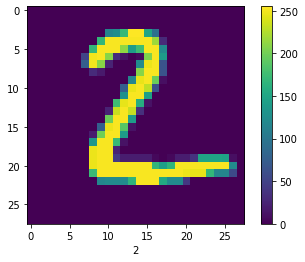

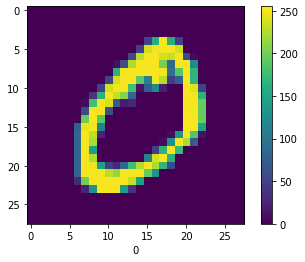

In [96]:
print(train_dataset_np.shape,train_dataset_np.size,train_dataset_np.ndim)
print(train_labels_np.shape,train_labels_np.size,train_labels_np.ndim)
print(test_dataset_np.shape,test_dataset_np.size,test_dataset_np.ndim)
print(test_labels_np.shape,test_labels_np.size,test_labels_np.ndim)
for i in range(0,2):
  plt.imshow(test_dataset_np[i,:,:])
  plt.xlabel(test_labels_np[i])
  plt.colorbar()
  plt.show()
  plt.imshow(train_dataset_np[i,:,:])
  plt.xlabel(train_labels_np[i])
  plt.colorbar()
  plt.show()



In [0]:
train_dataset_np=train_dataset_np/255.0
test_dataset_np=test_dataset_np/255.0

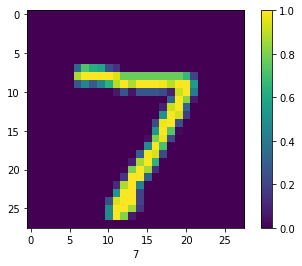

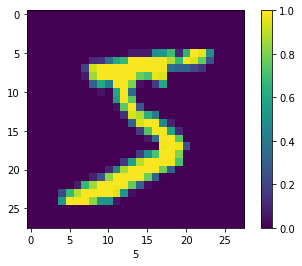

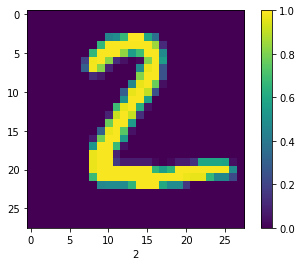

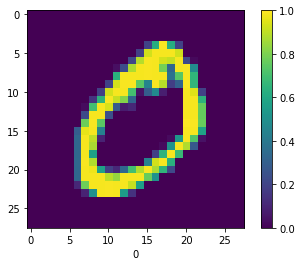

In [99]:
for i in range(0,2):
  plt.imshow(test_dataset_np[i,:,:])
  plt.xlabel(test_labels_np[i])
  plt.colorbar()
  plt.show()
  plt.imshow(train_dataset_np[i,:,:])
  plt.xlabel(train_labels_np[i])
  plt.colorbar()
  plt.show()


In [100]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [102]:
model.fit(train_dataset_np, train_labels_np, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2604 - accuracy: 0.9254
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1139 - accuracy: 0.9653
Epoch 3/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0777 - accuracy: 0.9761
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0575 - accuracy: 0.9823
Epoch 5/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0445 - accuracy: 0.9864
Epoch 6/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0352 - accuracy: 0.9890
Epoch 7/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0280 - accuracy: 0.9915
Epoch 8/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0232 - accuracy: 0.9930
Epoch 9/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0189 - accuracy: 0.9943
Epoch 10/10
60

In [103]:
test_loss, test_acc = model.evaluate(test_dataset_np,  test_labels_np, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.0740 - accuracy: 0.9804

Test accuracy: 0.9804


In [0]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_dataset_np)

In [108]:
print(predictions[0],np.argmax(predictions[0]),test_labels_np[0])

[2.88324226e-11 1.10305363e-12 2.58733568e-09 1.45136039e-06
 9.24287773e-15 7.63693997e-10 1.03671266e-17 9.99995351e-01
 3.25670324e-10 3.20974959e-06] 7 7


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format( predicted_label,
                      100*np.max(predictions_array),
                      true_label),
                      color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

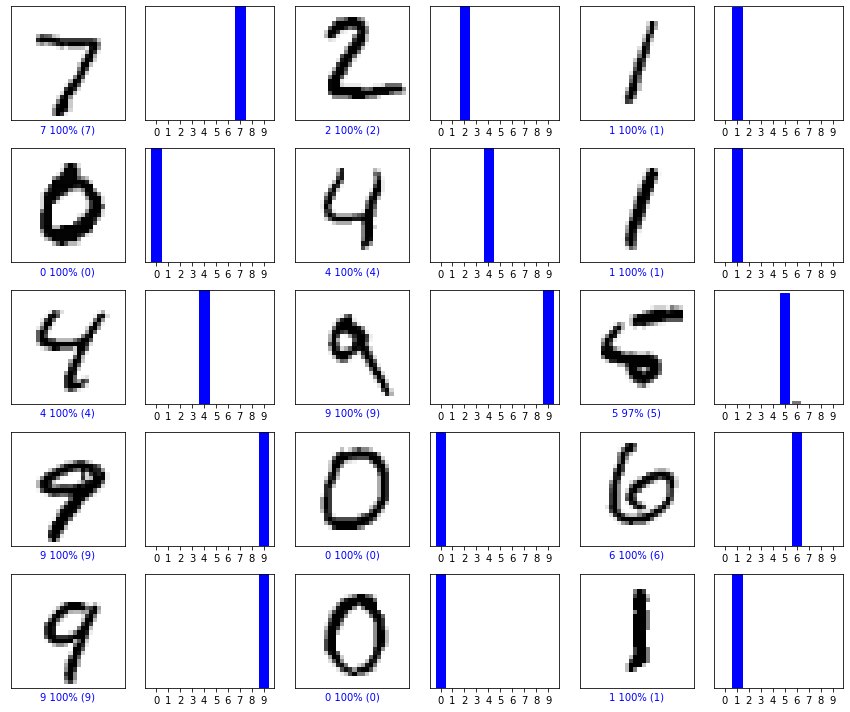

In [116]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels_np, test_dataset_np)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels_np)
plt.tight_layout()
plt.show()